# Исследование объявлений о продаже квартир



# Описание проекта

Используя данные сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

# Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# импортировали нужные библиотеки

pd.set_option('display.max_columns', 50) # вывод всех столбцов

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# прочитали файл и разделили колонки параметром sep

In [ ]:
data.head(10)
# просмотр данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд, очень много NaN в таблице.

In [ ]:
data.info()
# просмотр информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропущенных значений и правда довольно много.

In [ ]:
data.describe()
# посмотрим общую информацию о данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В целом, данные выглядят нормально. Правда, есть 100 метровые потолки и 19 комнатные квартиры. В дальнейшем решим, что с этим делать.

### Вывод

После получения информации о данных видим:
1. **first_day_exposition** - тип object - должен быть тип datetime.
2. **floors_total** - должен быть тип int, т.к. количество этажей - целое значение.
3. **is_apartment** - по условию должен быть тип bool.
4. **parks_around3000** - тип должен быть int. 
5. **ponds_around3000** - тип должен быть int.
6. **days_exposition** - тип должен быть int. 
7. **balcony** - тип должен быть int.
8. Неккоректное название столбцов.
9. Большое количество пропусков.

## Предобработка данных

Для начала изменим названия необходимых столбцов.

In [ ]:
data.columns
# посмотрим на названия всех столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 
                            'parks_around3000' : 'parks_around_3000', 
                            'ponds_around3000':'ponds_around_3000'})
# переименовали необходимые столбцы

In [ ]:
data.columns
# проверка результата

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
data.duplicated().sum()
# проверка на дубликаты

0

Дубликатов нет, отллично!

In [ ]:
data.isna().sum()
# посмотрим общее количесвто пропусков для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Предложения по заполнению пропусков:
* **is_apartment** - самое большое количество пропусков. Видимо этот столбец появился не вместе с началом ведения записей. Предположу, что не все люди понимали разницу между апартаментами и квартирами и просто пропускали данный пункт. Посмотрим , какие значения присутствуют и примем решения об их заполнении.
* **parks_around_3000**, **parks_nearest**, **ponds_around_3000**, **ponds_nearest** - скорее всего, данные просто не были выгружены, либо просто действительно парки и пруды отстутствуют. Так как это не самые важные параметры для нашего исследования, эти пропуски трогать не будем.
* **airports_nearest**, **city_centers_nearest** - думаю с этими пропусками тоже ничего нельзя сделать, оставим как есть. Причиной появления данных пропусков может быть плохой расчет данных параметров системой.
* **balсony** - предположу, что на месте NaN должен быть 0, то есть отсутствие балкона. При заполнении люди либо пропускали этот столбец, либо ставили прочерк, поэтому в данных есть пропуски.
* **days_exposition** - довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже квартиры. Заполним данные пропуски 0-ым значением.
* **ceiling_height** - можно предположить, что не все люди знают высоту своих потолков и эта не такая важная информация для продажи квартиры. Поэтому при заполнении они пропускают данный пункт. Так же в данном столбце присутствуют аномальные значения, в дальнейшем посмотрим, что с этим можно сделать.
* **floors_total** - пропущенно не так много значений, представленны в вещественном виде, заполню пропуски 0 и приведу в целочисленный тип. 

Посмотрим на уникальные значения столбцов, есть ли там аномалии, ошибки, ознакомимся с информацией.

In [ ]:
data['rooms'].value_counts()
# просмотр значений

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [ ]:
data['floors_total'].value_counts()
# просмотр значений

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [ ]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
print('Количество NaN в столбце floors_total:', data['floors_total'].isna().sum())

Количество NaN в столбце floors_total: 0


In [ ]:
data['floor'].value_counts()
# просмотр значений

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

In [ ]:
data['total_area'].value_counts()
# просмотр значений

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [ ]:
data['is_apartment'].value_counts()
# просмотр значений

False    2725
True       50
Name: is_apartment, dtype: int64

Все пропущенные значения заменим на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isna().sum())
# замена пропущенных значений на False
# проверка результата

Количество NaN в столбце is_apartment: 0


In [ ]:
data['balcony'].value_counts()
# просмотр значений

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [ ]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
print('Количество NaN в столбце balcony:', data['balcony'].isna().sum())
# заполнение пропусков, перевод в тип int
# проверка результата

Количество NaN в столбце balcony: 0


In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
print('Количество NaN в столбце days_exposition:', data['days_exposition'].isna().sum())
# заполнение пропусков, перевод в тип int
# проверка результата

Количество NaN в столбце days_exposition: 0


In [ ]:
data['last_price'] = data['last_price'].astype('int')
# изменим на тип int для удобства просмотра

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# переведем столбец с датой в формат даты

In [ ]:
data.info()
# посмотрим на информацию для проверки результата.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Предобработка проведена. Определили и изучили пропущенные значения. Изменили тип данных и заполнили пропуски.

## Расчёты и добавление результатов в таблицу

In [ ]:
data['price_of_m2'] = data['last_price'] / data['total_area']
# посчитаем и добавим цену за квадратный метр

In [ ]:
data['price_of_m2'] = data['price_of_m2'].astype('int')
# приведем к типу int

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
# создам столбец дня недели

In [ ]:
data['month'] = data['first_day_exposition'].dt.month
# создам столбец месяца 

In [ ]:
data['year'] = data['first_day_exposition'].dt.year
# создам столбец года

In [ ]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
# функция для категоризации этажей

In [ ]:
data['floor_category'] = data.apply(floor_category, axis = 1)
# добавление нового столбца 

In [ ]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
# соотношение жилой и общей площади

In [ ]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
# отношение площади кухни к общей

In [ ]:
data.head(10)
# проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_m2,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524,6,2,2017,другой,0.714754,0.106557


Все необходимые столбцы и расчеты добавлены в таблицу.

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [1]:
data['total_area'].describe()
# посмотрим данные

NameError: ignored

In [ ]:
data.plot(y='total_area', kind='hist', bins=20, grid=True, range=(0,500), figsize = (6,4), title='total_area')
# строим гистограмму

In [ ]:
data['last_price'].describe()
# посмотрим данные

In [ ]:
data.plot(y='last_price', kind='hist', bins=20, grid=True, range=(0,8000000), figsize = (6,4), title='last_price')
# строим гистограмму

In [ ]:
data['rooms'].describe()
# посмотрим данные

In [ ]:
data.plot(y='rooms', kind='hist', bins=20, grid=True, figsize = (6,4), title='rooms')
plt.xticks(range(20));
# строим гистограмму

In [ ]:
data['ceiling_height'].describe()
# посмотрим данные

In [ ]:
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, range=(2,5), figsize = (6,4), title='ceiling_height')
# строим гистограмму

**Вывод:**
1. **total_area** - общая площадь представлена от 12 до 900м2. Среднее значение площади 60, а медиана 52м2. Из графика видно, что больше всего квартир с площадью примерно 50м2. 
2. **last_price** - среднее значение цены составляет 6.500.000 млн рублей. Из графика делаем вывод, что преобладают квартиры с ценой около 4.000.000 млн рублей.
3. **rooms** - больше всего представленно однокомнатных квартир.
4. **ceiling_height** - в среднем высота потолков состовляем 2.77м, медианной значение 2.65м. Из графика видим, что преобладающая высота потолков от 2.5 до 3.0 м, для Санкт-Петербурга это вролне приемлимо.

Во всех изученных данных есть неадекватные значения. Площадь в 900м2, цена за квартиру 12190 рублей, количество комнат 0 и 19, высота потолков в 100м. Для общего исследования мы не будем убирать данные значения, но обязательно нужно обратиться к сотрудникам, кто предоставил нам данные и указать на эти аномалии.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [ ]:
data[data['days_exposition']!=0]['days_exposition'].describe()
# получаем информацию

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

(1.0, 1600.0)

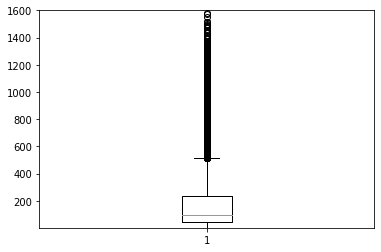

In [ ]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1600)
# диаграмма размаха

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

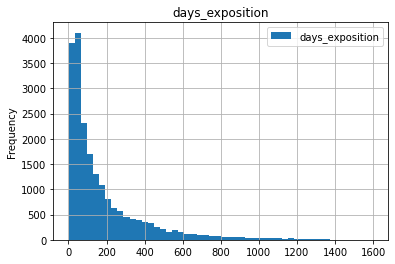

In [ ]:
data.plot(y='days_exposition', kind='hist', bins=50, grid=True, range=(1,1600), figsize=(6,4), title='days_exposition')
# строим гистограмму

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

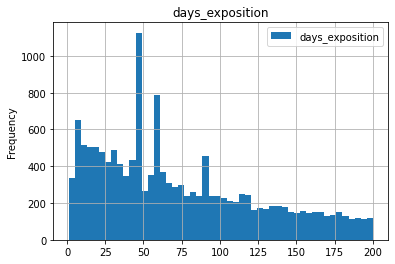

In [ ]:
data.plot(y='days_exposition', kind='hist', bins=50, grid=True, range=(1,200), figsize=(6,4), title='days_exposition')
# строим гистограмму

In [ ]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод:**

С помощью метода describe() определили среднее значение и медиану, они равны 180 и 95 дням соответственно. Построили диаграмму размаха, там все в порядке. С помощью гистограммы со значениями от 0 до 200 определили, что есть выбивающие значения, посмотрели методом value_counts() и это подтвердилось. 7,30,45,60,90 дней - наиболее частое количество дней до снятия объявления. Это может быть связано с платформой, где размещают объявления, а также со сроком его размещения. Он может быть бесплатным и платным. Будем считать это аномальными значениями и удалим их. 

Но сперва ответим на вопрос когда можно считать, что продажи прошли очень быстро, а когда необычно долго, имея данные выбросы.
Исходя из полученных данных, межквартильный размах состовляет от 45 до 232 дней. Если смотреть на boxplot, то можно сказать, что данные распологаются от 0 до 500. То есть аномально быстрых продаж нет, а вот необычно долгие можно считать от 500 дней и выше. Следовательно нормальны продажи от 0 до 500 дней, но это с учетом аномалий, о которых мы сказали выше, посмотрим, как будет дальше после их удаления.

Считаю важным уточнить у сотрудников насчет выбивающихся значений по датам снятия объявлений, чтобы убедиться в том, какие данные необходимо исключить из выборки.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [ ]:
data[data['days_exposition']!=0]['days_exposition'].value_counts().sum()

20518

In [ ]:
good_data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
# удалим аномалии с помощью метда query() и создадим новый датафрейм

In [ ]:
good_data['days_exposition'].value_counts().sum()

18454

In [ ]:
(data[data['days_exposition']!=0]['days_exposition'].value_counts().sum() / good_data['days_exposition'].value_counts().sum() - 1) * 100

11.184567031537874

После отброса выбросов получили потерю данных в 11%, не критично для ответа на поставленный вопрос.

<AxesSubplot:>

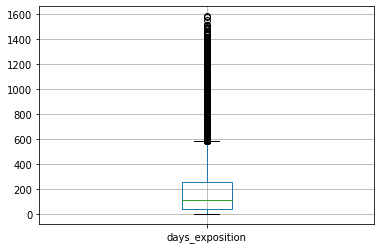

In [ ]:
good_data.boxplot('days_exposition')
# диаграмма размаха

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

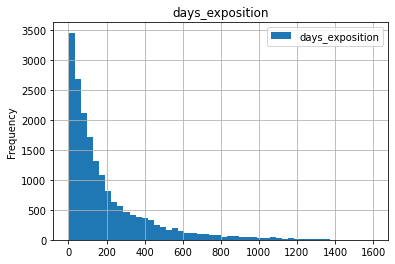

In [ ]:
good_data.plot(y='days_exposition', kind='hist', bins=50, grid=True, range=(1,1600), figsize=(6,4), title='days_exposition')
# строим гистограмму

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

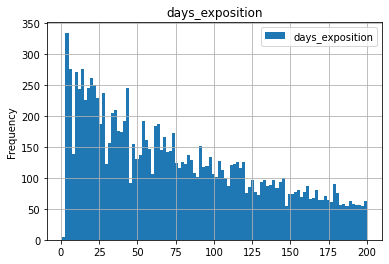

In [ ]:
good_data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200), figsize=(6,4), title='days_exposition')
# строим гистограмму

In [ ]:
good_data['days_exposition'].describe()
# получение информации

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
good_data['days_exposition'].value_counts()
# уникальные значения

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64

**Вывод:**

После обработки аномальных значений получили среднее и медианное значение 195 и 114 дней соответсвенно. На диаграмме размаха нормальные значения теперь от 0 до 600 дней. При удалении аномальных значений медиана и среднее значение увеличивается. Обработка выполнена.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади

In [ ]:
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area
# создадим сводную таблицу

,mean,count,median
total_area,,,
12.0,2400000.0,1,2400000.0
13.0,2350000.0,3,1850000.0
13.2,1686000.0,1,1686000.0
14.0,1190000.0,1,1190000.0
15.0,1725000.0,2,1725000.0
...,...,...,...
590.0,65000000.0,1,65000000.0
618.0,300000000.0,1,300000000.0
631.0,140000000.0,1,140000000.0


<AxesSubplot:xlabel='total_area'>

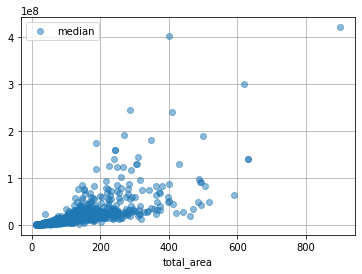

In [ ]:
pivot_total_area.plot(y='median', style='o', grid=True, alpha=0.5)
# диаграмма рассеяния

In [ ]:
data['total_area'].corr(data['last_price'])
# значение корреляции

0.6536750579657242

**Вывод:**

Исходя из общих соображений и из полученного результата можно сказать, что чем больше площадь квартиры, тем больше и цена. Корреляция в 0.65 говорит о том, что между этими величинами есть связь.

#### Зависимость цены от числа комнат

In [ ]:
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_rooms.columns = ['mean', 'count', 'median']
pivot_rooms.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
rooms,,,
12,4.200000e+08,1,420000000
15,6.500000e+07,1,65000000
19,3.225000e+07,1,32250000
16,2.850000e+07,1,28500000
14,2.682950e+07,2,26829500
11,2.525000e+07,2,25250000
7,5.147007e+07,59,24900000
9,3.415236e+07,8,23750000
8,5.022417e+07,12,23095000


<AxesSubplot:xlabel='rooms'>

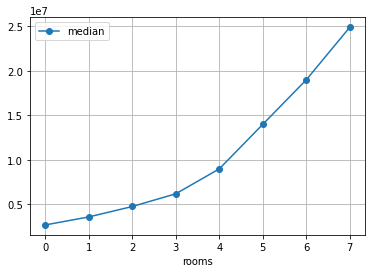

In [ ]:
pivot_rooms.query('count > 50').plot(y='median', style='o-', grid=True)
# построение диаграммы

In [ ]:
data['rooms'].corr(data['last_price'])
# значение корреляции

0.3633428499648948

**Вывод:**

Довольно странное значение корреляции, 0.36, зависимоть есть, но не очевидная. Однако на графике видим прямую зависимость цены от увеличения комнат. Предварительно задали срез с количеством квартир больше 50, так как есть аномальное значение на 12-ти комнатной квартире.

#### Зависимость цены от удаленности от центра

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>

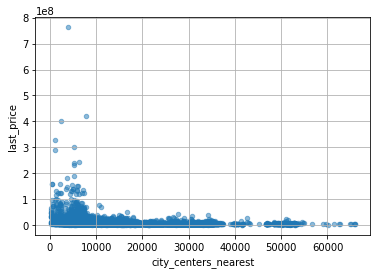

In [ ]:
data.plot(kind='scatter', x='city_centers_nearest', y='last_price', grid=True, alpha = 0.5)
# диаграмма рассеяния

In [ ]:
data['city_centers_nearest'].corr(data['last_price'])
# значение корреляции

-0.20674734874298373

**Вывод:**

Зависимость между расстоянием от центра и ценой присутствует. Чем ближе к центру, тем выше цена.

#### Зависимость цены от этажа (первый, последний, другой) 

In [ ]:
pivot_floor = data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_floor.columns = ['mean', 'count', 'median']
pivot_floor
# создадим сводную таблицу

,mean,count,median
floor_category,,,
другой,6.675444e+06,17446,4850000
первый,4.803560e+06,2917,3900000
последний,7.361025e+06,3336,4300000


<AxesSubplot:xlabel='floor_category'>

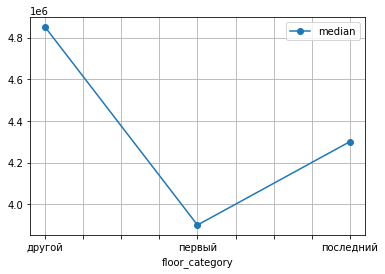

In [ ]:
pivot_floor.plot(y='median', style='o-', grid=True)
# график для медианы

<AxesSubplot:xlabel='floor_category'>

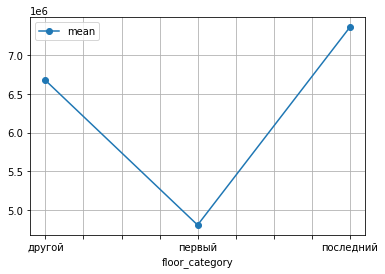

In [ ]:
pivot_floor.plot(y='mean', style='o-', grid=True)
# график для среднего значения

**Вывод:**
На первом этаже всегда самые дешевые квартиры. Это показывает оба наших графика и цены в реальной жизни. Так как в столбце **last_price** есть аномальные значения, построил два графика: для среднего значения и для медианы. Зависимость есть в обоих случаях.

#### Зависимость цены от даты размещения: дня недели

In [ ]:
pivot_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_weekday.columns = ['mean', 'count', 'median']
pivot_weekday.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
weekday,,,
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
0,6.511613e+06,3612,4650000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


<AxesSubplot:xlabel='weekday'>

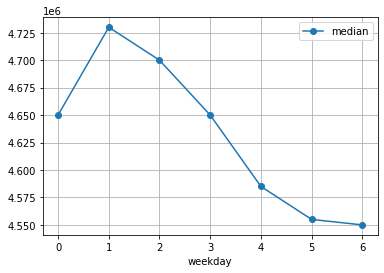

In [ ]:
pivot_weekday.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

Видим увеличение стоимости ближе к вторнику, но на небольшую сумму, на выходных цена самая низкая. Это можно бъяснить тем, что в рабочие дни люди более активно посещают сайты продаж недвижимости, нежели в выходные дни.

#### Зависимость цены от даты размещения: месяца

In [ ]:
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_month.columns = ['mean', 'count', 'median']
pivot_month.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
month,,,
4,6.737198e+06,2379,4800000
9,6.825470e+06,1981,4700000
11,6.461363e+06,2371,4700000
12,7.011731e+06,1641,4700000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
7,6.649337e+06,1695,4650000
1,6.668233e+06,1500,4600000
8,6.350233e+06,1744,4570000


<AxesSubplot:xlabel='month'>

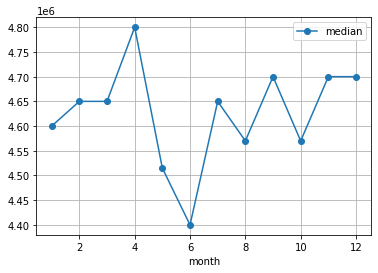

In [ ]:
pivot_month.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

Самая высокая цена на квартиру приходит на апрель месяц, самая низкая на июнь. Большинство людей берут свои отпуска летом, предполагаю, что с этим и связанна снижение цены на квартиру. Поэтому выставлять квартиру на продажу летом считаю невыгодным.

#### Зависимость цены от даты размещения: года

In [ ]:
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_year.columns = ['mean', 'count', 'median']
pivot_year.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
year,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


<AxesSubplot:xlabel='year'>

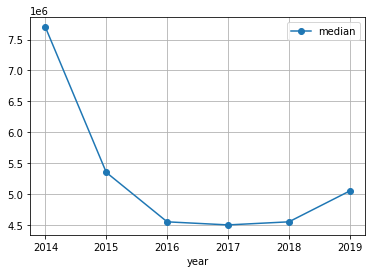

In [ ]:
pivot_year.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

На графике отчетливо видно падение стоимости квартир с 2014 по 2017 года. Далее цена начинает увеличиваться. Это что касается наших данных в среднем. 

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name

In [ ]:
pivot_locality_name = data.pivot_table(index='locality_name', values='price_of_m2', aggfunc=['count', 'mean'])
pivot_locality_name.columns = ['count', 'mean']
pivot_locality_name = pivot_locality_name.sort_values('count', ascending = False).head(10)
pivot_locality_name
# сводная таблица

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


{'whiskers': [<matplotlib.lines.Line2D at 0x7f09ee3eae20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f09ee379520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f09ee3eaac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f09ee379be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f09ee379f40>],
 'means': []}

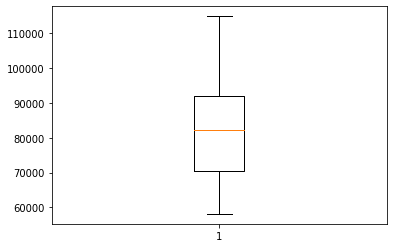

In [ ]:
plt.boxplot(pivot_locality_name['mean'])
# строим диаграмму размаха по средней цене  за квадратный метр

{'whiskers': [<matplotlib.lines.Line2D at 0x7f09eec7fc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f09eecc3610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f09eec7f670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f09eebd3be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f09eece6d00>],
 'means': []}

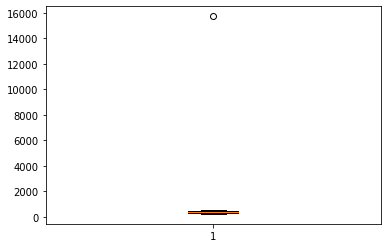

In [ ]:
plt.boxplot(pivot_locality_name['count'])
# диаграмма размаха для количесва

Из-за большой разницы в количествах объявлений межлу Санкт-Петербургом и остальными городами диаграмма не читается, поэтому применим ylim для более точного просмотра.

(1.0, 1000.0)

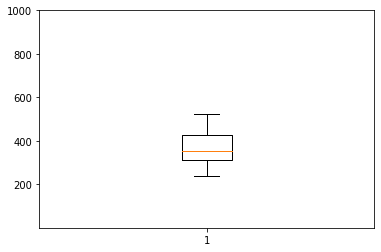

In [ ]:
plt.boxplot(pivot_locality_name['count'])
plt.ylim(1,1000)
# диаграмма размаха для количества с ylim

<AxesSubplot:xlabel='locality_name'>

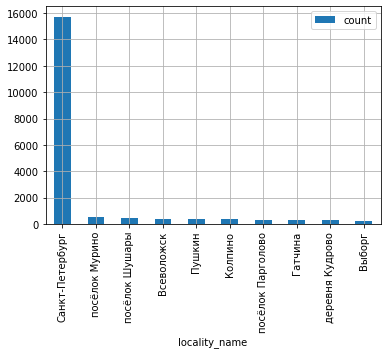

In [ ]:
pivot_locality_name.plot(y='count', kind='bar', grid=True, figsize = (6,4))
# столбчатая диаграмма для количества объявлений

<AxesSubplot:xlabel='locality_name'>

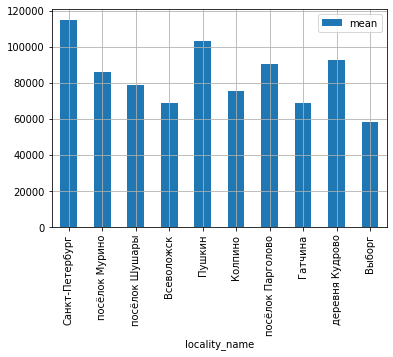

In [ ]:
pivot_locality_name.plot(y='mean', kind='bar', grid=True, figsize = (6,4))
# столбчатая диаграмма для средней цены за квадратный метр

Диаграммы построены.

In [ ]:
pivot_locality_name[pivot_locality_name['mean']==pivot_locality_name['mean'].max()]
# населенный пункт с самой высокой стоимостью за квадратный метр

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [ ]:
pivot_locality_name[pivot_locality_name['mean']==pivot_locality_name['mean'].min()]
# населенный пункт с самой низкой стоимостью за квадратный метр

,count,mean
locality_name,,
Выборг,237,58141.489451


**Вывод:**

На первом месте по числу объявлений стоит Санкт-Петербург, на последнем Выборг. Такая же ситуация и с ценой за квадратный метр.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона

In [ ]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
# создали новый столбец расстояния в км

In [ ]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].fillna(0)
# заполним пропуски 0 значением для перевода в тип int

In [ ]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
pivot_table_km
# сводная таблица

,last_price
city_centers_nearest_km,
0,2.022673e+07
1,1.885085e+07
2,1.616331e+07
3,1.343683e+07
4,1.363202e+07
5,1.530612e+07
6,1.438911e+07
7,1.279767e+07
8,8.445272e+06


<AxesSubplot:xlabel='city_centers_nearest_km'>

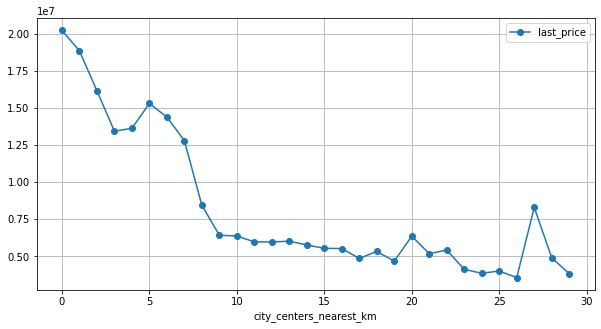

In [ ]:
pivot_table_km.plot(y='last_price', style='o-', figsize=(10,5), grid=True)

**Вывод:**

Исходя из полученных данным предположим, что центральная зона ограничивается 5 км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [ ]:
data_center = data.query('city_centers_nearest_km <= 5 and locality_name == "Санкт-Петербург"')
# сегмент квартир в центре Санкт-Петербурга

In [ ]:
data_center[['total_area','last_price','rooms','ceiling_height']]
# посмторим на значения

,total_area,last_price,rooms,ceiling_height
24,97.20,6500000,2,NaN
35,149.00,15500000,5,NaN
61,74.00,7990000,2,NaN
63,118.00,20000000,3,3.00
81,68.00,10949000,1,NaN
...,...,...,...,...
23648,78.00,10100000,3,3.27
23664,110.00,9000000,4,3.36
23665,47.00,4250000,1,NaN
23691,72.90,9470000,2,2.75


#### Зависимость цены от числа комнат

In [ ]:
pivot_rooms_center = data_center.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_rooms_center.columns = ['mean', 'count', 'median']
pivot_rooms_center.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
rooms,,,
15,6.500000e+07,1,65000000
19,3.225000e+07,1,32250000
9,4.466667e+07,3,29000000
14,2.865900e+07,1,28659000
16,2.850000e+07,1,28500000
10,2.775000e+07,2,27750000
11,2.525000e+07,2,25250000
7,5.412611e+07,53,24900000
8,4.977900e+07,10,21045000


<AxesSubplot:xlabel='rooms'>

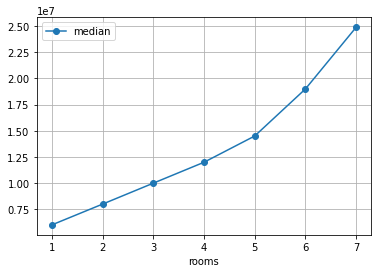

In [ ]:
pivot_rooms_center.query('count > 50').plot(y='median', style='o-', grid=True)
# построение диаграммы

In [ ]:
data_center['rooms'].corr(data_center['last_price'])
# значение корреляции

0.2996670086153773

**Вывод:**

Еще раз подтвердили , что с увеличением числа комнат растет и цена. Однако что касается всей выборки и центра Санкт-Петербурга, цена в центре выше. Возьмем на примере однокомнатную квартиру. Медиана общей выборки 3.600.000 млн рублей, а центра 6.000.000 млн.

#### Зависимость цены от удаленности от центра

<AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>

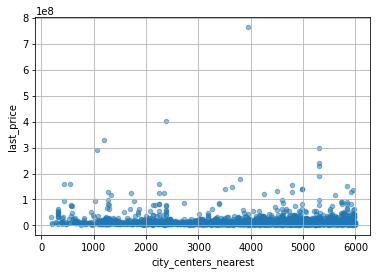

In [ ]:
data_center.plot(kind='scatter', x='city_centers_nearest', y='last_price', grid=True, alpha = 0.5)
# диаграмма рассеяния

In [ ]:
data_center['city_centers_nearest'].corr(data_center['last_price'])
# значение корреляции

-0.04768867967504122

**Вывод:**

Зависимости не видим, так как она была сделана в общей выборки.

#### Зависимость цены от этажа (первый, последний, другой)

In [ ]:
pivot_floor_center = data_center.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_floor_center.columns = ['mean', 'count', 'median']
pivot_floor_center
# создадим сводную таблицу

,mean,count,median
floor_category,,,
другой,1.497601e+07,2032,9900000
первый,9.488535e+06,332,6800000
последний,1.894860e+07,532,9816985


<AxesSubplot:xlabel='floor_category'>

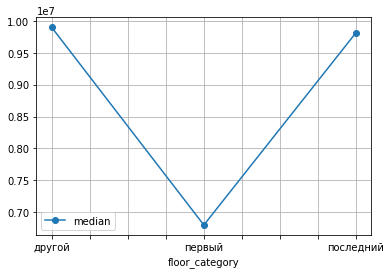

In [ ]:
pivot_floor_center.plot(y='median', style='o-', grid=True)
# график для медианы

<AxesSubplot:xlabel='floor_category'>

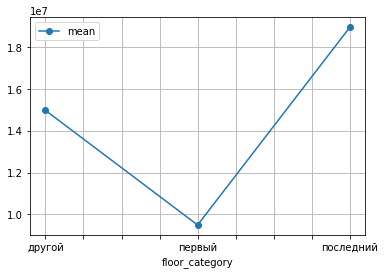

In [ ]:
pivot_floor_center.plot(y='mean', style='o-', grid=True)
# график для среднего значения

**Вывод:**

Зависимость как и в общей базе, цены увеличиваются с увеличением этажа. Что касается медианной стоимости, для общей базы цена квартиры на первом этаже состовляет 3.900.000 млн. рублей, в центре же квартира будет стоить 6.800.000

#### Зависимость цены от даты размещения: дня недели

In [ ]:
pivot_weekday_center = data_center.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_weekday_center.columns = ['mean', 'count', 'median']
pivot_weekday_center.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
weekday,,,
6,1.588410e+07,153,9900000
2,1.469618e+07,491,9640000
0,1.481697e+07,450,9527500
3,1.490259e+07,599,9500000
1,1.413171e+07,516,9495000
4,1.453621e+07,487,9000000
5,2.025312e+07,200,8860000


<AxesSubplot:xlabel='weekday'>

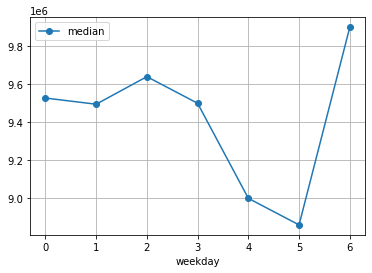

In [ ]:
pivot_weekday_center.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

Наконец ситуация отличается кардинально от общей базы. Самая высокая цена приходится на воскресенье, в отличии от вторника в обзей выборки. Падают цены в пятницу и субботу. 

#### Зависимость цены от даты размещения: месяца

In [ ]:
pivot_month_center = data_center.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_month_center.columns = ['mean', 'count', 'median']
pivot_month_center.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
month,,,
1,1.565188e+07,181,10550000
2,1.576851e+07,330,10000000
9,1.655382e+07,240,9995000
3,1.551922e+07,302,9500000
11,1.415086e+07,291,9500000
5,1.495224e+07,158,9375000
7,1.475789e+07,231,9300000
8,1.413301e+07,210,9200000
12,1.619009e+07,205,9100000


<AxesSubplot:xlabel='month'>

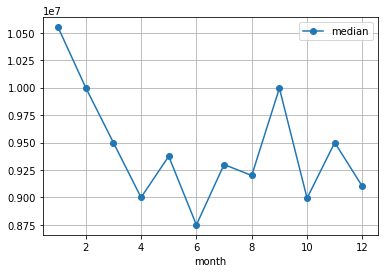

In [ ]:
pivot_month_center.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

Самая высокая цена на квартиру приходит на январь, самая низкая на июнь. В общих данных самая низкая цена тоже приходит на июнь, однако самая высокая цена в апреле. В центре города квартиры с самой высокой стоимостью начинают продавать в начале года.

#### Зависимость цены от даты размещения: года

In [ ]:
pivot_year_center = data_center.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_year_center.columns = ['mean', 'count', 'median']
pivot_year_center.sort_values('median', ascending = False)
# создадим сводную таблицу

,mean,count,median
year,,,
2014,2.660081e+07,23,20600000
2015,1.750523e+07,264,10600000
2019,1.563921e+07,333,9649000
2016,1.468829e+07,400,9350000
2018,1.323460e+07,849,9270000
2017,1.568602e+07,1027,9200000


<AxesSubplot:xlabel='year'>

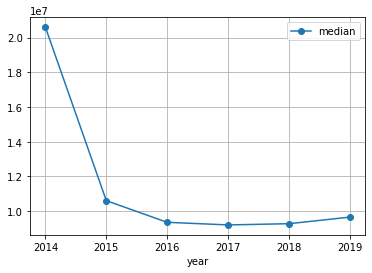

In [ ]:
pivot_year_center.plot(y='median', style='o-', grid=True)
# график зависимости

**Вывод:**

Что касается цены на квартиру в год, читуация похожа с общей базой, резкое падение цена после 2014 года. 

## Общий вывод

### Был обработан полученный архив с данными о продажах квартир.  Определи и заполнили пропуски там, где это было необходимо для дальнейших исследований. Заменили тип данных на необходимые для работы. Добавили в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, а также категории по этажам квартиры. 

### Изучены параметры площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Для каждого параметра построили гистограммы.
#### Медианные значения для каждого параметра:
* площадь квартиры : 52 квадратных метра.
* цена : 4.650.000 млн. рублей
* число комнат : 2
* высота потолков : 2.65 м.



### Изучая время продажи квартиры, обнаружили, что есть аномальные дни, когда объявления снимаются чаще всего, об этом нужно уточнить у сотрудников продаж или у платформы, где были выставленны объйявления. 

* Исходя из диаграммы размаха : "нормальные" значения продажи квартир лежат от 1 до 600 дней. 

### Определили большую зависимость на цену квартиры от площади, числа комнат, этажа квартиры и ее удаленности от центра. Незначительно на стоимость квартиры влияет день недели, месяц и год размещения. Однако, начиная с 2015 года квартиры в среднем уменишились в цене, возможен был какой-то всплеск на рынке недвижимости.


### Узнали, что в Санкт-Петербурге  самое большое количество объявлений о продаже квартир и самая высокая цена за квадратный метр. В Выборге же все наоборот. 
* Санкт-Петербург: количество объявлений = 15721, средняя цена за квадратный метр = 114848.565231
* Выборг: количество объявлений = 237, средняя цена за квадратный метр = 58141.489451

### Посчитали и приняли решение, что центром города является расстояние в 5км. Проанализировали эту территорию по схожим показателям и сравнили с общими данными, зависимости оказались похожими, отличается лишь только средняя цена квартиры в центре.